<a href="https://colab.research.google.com/github/kitkit922/Machine_Learning_1/blob/main/Assignment6_TszKitCheung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tsz Kit Cheung (Kevin) N01555831 Assignment 6

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Tsz Kit Cheung N01555831 ITE 5310 Assignment 6

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd
from IPython import display
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/L7/Assign06/Student-Pass-Fail-Data.csv')

In [ ]:
print(data.head())

   Self_Study_Daily  Tution_Monthly  Pass_Or_Fail
0                 7              27             1
1                 2              43             0
2                 7              26             1
3                 8              29             1
4                 3              42             0


In [ ]:
X = data.iloc[:,:-1].values
print(X[:5])


[[ 7 27]
 [ 2 43]
 [ 7 26]
 [ 8 29]
 [ 3 42]]


In [ ]:
y = data.iloc[:,-1].values
print(y[:5])

[1 0 1 1 0]


#Perform Classification using Logistic Regression Classifier.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X.shape

(1000, 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = LogisticRegression()
LR = model.fit(X_train, y_train)
y_pred_prob = LR.predict_proba(X_test)
y_pred = LR.predict(X_test)


In [ ]:
df = pd.DataFrame({"Prob_class_0" : np.round(y_pred_prob[:,0], decimals = 2)
,"Prob_class_1": np.round(y_pred_prob[:,1], decimals = 2)
,"Predicted class": y_pred})
df

,Prob_class_0,Prob_class_1,Predicted class
0,0.91,0.09,0
1,1.00,0.00,0
2,0.05,0.95,1
3,1.00,0.00,0
4,0.14,0.86,1
...,...,...,...
195,1.00,0.00,0
196,0.04,0.96,1
197,1.00,0.00,0
198,1.00,0.00,0


In [ ]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

#Evaluate classification problem using confusion matrix.

In [ ]:
Accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 98.50


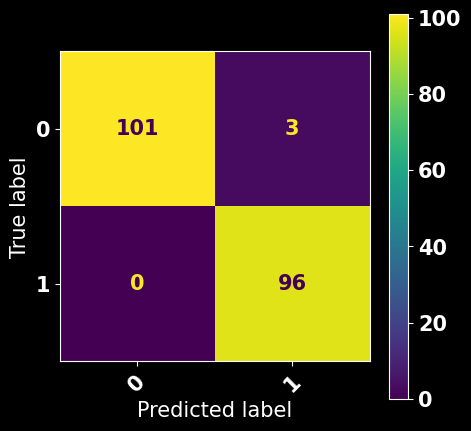

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(5)
fig.set_figheight(5)
plt.show()

# Calculate accuracy, precision, recall and F1-Score.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       104
           1       0.97      1.00      0.98        96

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



#Using Cross Validation (5 - fold)

In [ ]:
k = 5
cv = KFold(n_splits=k, random_state = 42 , shuffle=True)

# Build multiple logistic regression model
model_cv = LogisticRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model_cv, X, y, scoring='accuracy', cv=cv )
np.mean(scores)
print("Avg accuracy : %0.2f" % (np.mean(scores)))

Avg accuracy : 0.98


In [ ]:
y_pred_cv = cross_val_predict(model_cv, X_test, y_test, cv = cv)
Accuracy = np.mean(y_pred_cv == y_test) * 100
print("Avg accuracy : %2.2f" % (Accuracy))

Avg accuracy : 98.00


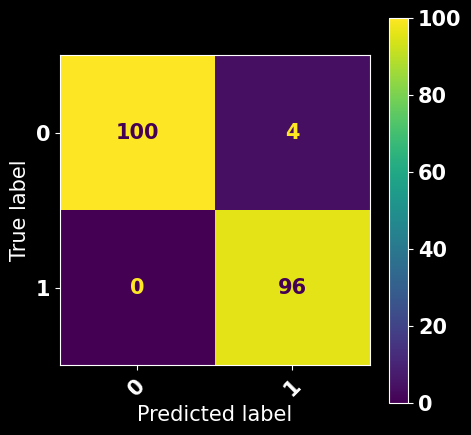

In [ ]:

cm = confusion_matrix(y_test, y_pred_cv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(5)
fig.set_figheight(5)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       104
           1       0.96      1.00      0.98        96

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

